In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.weightstats import ttost_ind

df = pd.read_csv('data.csv')

df_encoded = pd.get_dummies(df, columns=['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema','Status'], drop_first=True)

X = df_encoded.drop(columns=['Drug'])  
y = df_encoded['Drug']  

- `Censored` `Censored Due to Liver` `Death`

In [4]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [5]:
df_encoded.head()

,N_Days,Drug,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Prothrombin,Stage,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Status_CL,Status_D
0,2221,Placebo,18499,0.5,149.0,4.04,227.0,598.0,52.70,57.0,...,9.9,1,False,False,True,False,False,False,False,False
1,1230,Placebo,19724,0.5,219.0,3.93,22.0,663.0,45.00,75.0,...,10.8,2,True,True,False,True,False,False,False,False
2,4184,Placebo,11839,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,...,10.0,2,False,False,False,False,False,False,False,False
3,2090,Placebo,16467,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,...,10.2,2,False,False,False,False,False,False,False,True
4,2105,Placebo,21699,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,...,11.5,1,False,False,True,False,False,False,False,True


In [6]:
print(X.dtypes)

N_Days              int64
Age                 int64
Bilirubin         float64
Cholesterol       float64
Albumin           float64
Copper            float64
Alk_Phos          float64
SGOT              float64
Tryglicerides     float64
Platelets         float64
Prothrombin       float64
Stage               int64
Sex_M                bool
Ascites_Y            bool
Hepatomegaly_Y       bool
Spiders_Y            bool
Edema_S              bool
Edema_Y              bool
Status_CL            bool
Status_D             bool
dtype: object


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logit = LogisticRegression(solver='liblinear', max_iter=1000)
logit.fit(X_scaled, y)
df['propensity_score'] = logit.predict_proba(X_scaled)[:, 1]

# Display the propensity scores
df[['propensity_score', 'Drug']].head()

,propensity_score,Drug
0,0.570107,Placebo
1,0.922786,Placebo
2,0.437765,Placebo
3,0.413679,Placebo
4,0.361262,Placebo


In [8]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,propensity_score
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1,0.570107
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2,0.922786
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2,0.437765
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2,0.413679
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1,0.361262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2,0.442996
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2,0.442996
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3,0.337313
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2,0.568741


In [9]:

treated = df[df['Drug'] == 'D-penicillamine'] 
control = df[df['Drug'] == 'Placebo'] 

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])


distances, indices = nn.kneighbors(treated[['propensity_score']])
matched_control = control.iloc[indices.flatten()]

matched_df = pd.concat([treated, matched_control], ignore_index=True)

matched_df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,propensity_score
0,1735,C,D-penicillamine,12636,F,N,Y,N,N,0.7,193.000000,3.85,35.0,466.0,53.00,118.000000,423.0,10.5,2,0.670949
1,1666,C,D-penicillamine,25023,F,Y,Y,N,N,2.8,322.000000,3.06,65.0,2562.0,91.00,209.000000,137.0,10.6,2,0.805913
2,191,D,D-penicillamine,27398,F,Y,Y,N,Y,1.3,151.000000,3.08,73.0,1112.0,46.50,49.000000,213.0,13.2,3,0.614127
3,1037,D,D-penicillamine,14191,F,N,Y,Y,N,16.2,369.510563,2.89,42.0,1828.0,299.15,124.702128,123.0,12.6,3,0.634027
4,1690,D,D-penicillamine,10712,F,N,Y,N,N,6.3,436.000000,3.02,75.0,2176.0,170.50,104.000000,236.0,10.6,3,0.509292


- On Ndays but that is not correct in many sense

In [10]:
# Calculate ATE
treated_outcome = matched_df[matched_df['Drug'] == 'D-penicillamine']['N_Days']
control_outcome = matched_df[matched_df['Drug'] == 'Placebo']['N_Days']

# Average Treatment Effect (ATE)
ATE = np.mean(treated_outcome) - np.mean(control_outcome)
print(f"Average Treatment Effect (ATE): {ATE}")


from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(control_outcome,treated_outcome)
print(f"T-statistic: {t_stat}, P-value: {p_val}")      

Average Treatment Effect (ATE): -250.75242559686035
T-statistic: 14.593635275246042, P-value: 5.726729410527549e-48


### Interpretation of p-value in Average Treatment Effect (ATE)

In the analysis of the **Average Treatment Effect (ATE)** between two groups (Penicillin treatment vs. Placebo), the p-value obtained was:

#### Hypotheses
- **Null Hypothesis (H₀):** There is no difference in the outcomes between the treatment group (Penicillin) and the control group (Placebo).
- **Alternative Hypothesis (H₁):** There is a difference in the outcomes between the treatment and control groups.

#### Significance of the Result
- The p-value is extremely small (`5.7267e-48`), which indicates that the observed difference in outcomes between the treatment and control groups is **highly statistically significant**.
- Given that the p-value is much smaller than any conventional significance level (e.g., 0.05 or 0.01), we can **reject the null hypothesis** with strong confidence.
  
#### Conclusion
The results suggest that the **Penicillin treatment** has a statistically significant effect on the outcomes compared to the placebo. The effect is not due to random chance, and the treatment likely plays a crucial role in influencing the observed results.



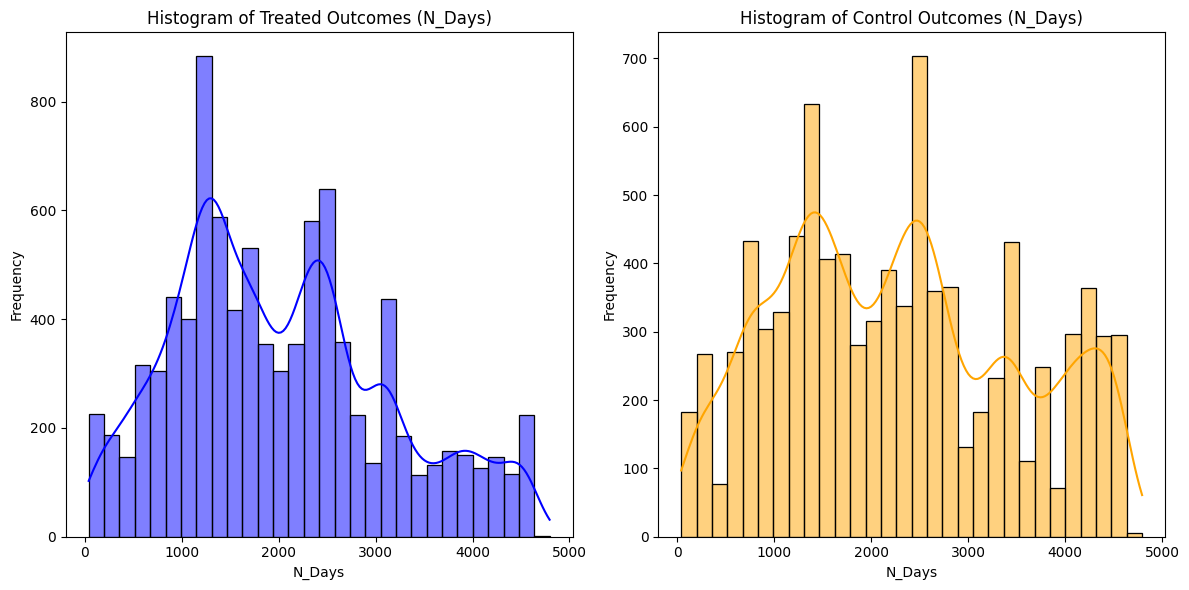

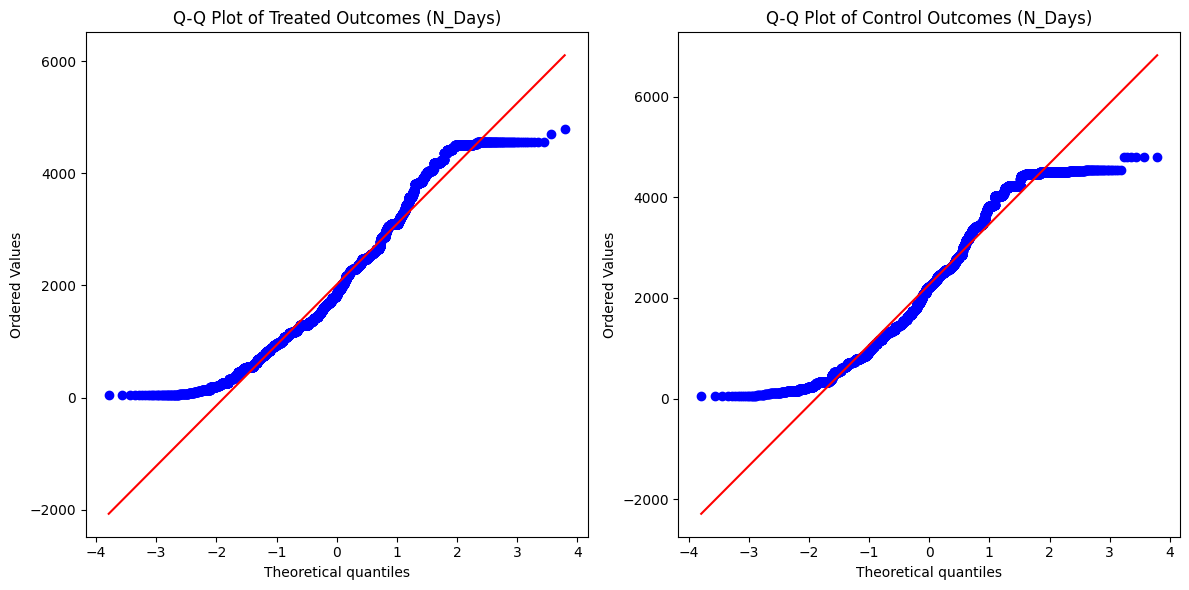

Shapiro-Wilk Test for Treated Outcomes: Statistic=0.9675967764938094, P-value=4.0899470059245054e-41
Shapiro-Wilk Test for Control Outcomes: Statistic=0.9627322397830228, P-value=2.5074282902528854e-43
D'Agostino Test for Treated Outcomes: Statistic=452.4824971248445, P-value=5.554873463522367e-99
D'Agostino Test for Control Outcomes: Statistic=1745.3126141787525, P-value=0.0


c:\Users\Aniket\miniconda3\envs\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9173.
  res = hypotest_fun_out(*samples, **kwds)


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, probplot

treated_outcome = matched_df[matched_df['Drug'] == 'D-penicillamine']['N_Days']
control_outcome = matched_df[matched_df['Drug'] == 'Placebo']['N_Days']

# Set up the figure for histograms
plt.figure(figsize=(12, 6))

# Histogram for treated outcomes
plt.subplot(1, 2, 1)
sns.histplot(treated_outcome, kde=True, color='blue', bins=30)
plt.title('Histogram of Treated Outcomes (N_Days)')
plt.xlabel('N_Days')
plt.ylabel('Frequency')

# Histogram for control outcomes
plt.subplot(1, 2, 2)
sns.histplot(control_outcome, kde=True, color='orange', bins=30)
plt.title('Histogram of Control Outcomes (N_Days)')
plt.xlabel('N_Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Q-Q plot for treated outcomes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
probplot(treated_outcome, dist="norm", plot=plt)
plt.title('Q-Q Plot of Treated Outcomes (N_Days)')

# Q-Q plot for control outcomes
plt.subplot(1, 2, 2)
probplot(control_outcome, dist="norm", plot=plt)
plt.title('Q-Q Plot of Control Outcomes (N_Days)')

plt.tight_layout()
plt.show()

# Shapiro-Wilk Test for normality
shapiro_treated = shapiro(treated_outcome)
shapiro_control = shapiro(control_outcome)

print(f"Shapiro-Wilk Test for Treated Outcomes: Statistic={shapiro_treated.statistic}, P-value={shapiro_treated.pvalue}")
print(f"Shapiro-Wilk Test for Control Outcomes: Statistic={shapiro_control.statistic}, P-value={shapiro_control.pvalue}")

# D'Agostino and Pearson's test for normality
dagostino_treated = normaltest(treated_outcome)
dagostino_control = normaltest(control_outcome)

print(f"D'Agostino Test for Treated Outcomes: Statistic={dagostino_treated.statistic}, P-value={dagostino_treated.pvalue}")
print(f"D'Agostino Test for Control Outcomes: Statistic={dagostino_control.statistic}, P-value={dagostino_control.pvalue}")


In [49]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(treated_outcome, control_outcome, alternative='two-sided')

print(f"Mann-Whitney U Test Statistic: {stat}, P-value: {p_value}")

Mann-Whitney U Test Statistic: 37267722.5, P-value: 6.501503177318492e-41


`Check Assumptions`: While the Mann-Whitney U test does not assume normality, it assumes that the two groups are independent and that the measurements are ordinal or continuous.<br>
`Visualize the Data`: Consider visualizing the results using box plots or violin plots to illustrate the distribution of the outcomes between the treated and control groups.

In [58]:
treated_outcome = treated_outcome.dropna()
control_outcome = control_outcome.dropna()

In [60]:
from scipy.stats import rankdata

# Combine the two outcomes for ranking
all_outcomes = np.concatenate([treated_outcome, control_outcome])

# Calculate ranks
ranks = rankdata(all_outcomes)
n1 = len(treated_outcome)
n2 = len(control_outcome)

# Calculate U statistic
U1 = n1 * n2 + (n1 * (n1 + 1)) / 2 - sum(ranks[:n1])  # Ranks for treated group
U2 = n1 * n2 - U1  # Ranks for control group

print(f"U1: {U1}, U2: {U2}")

r = (U1 - (n1 * n2 / 2)) / (n1 * n2)
print(f"Effect Size (r): {r}")

U1: 46876206.5, U2: 37267722.5
Effect Size (r): 0.05709552735527717


Effect Size (r = 0.0571): This effect size is a measure of the magnitude of the treatment effect. <br>According to Cohen's conventions:<br>
Small Effect: 
𝑟
≈
0.1

Medium Effect: 
𝑟
≈
0.3

Large Effect: 
𝑟
≈
0.5

Use Cohen's d alongside a t-test to provide additional information about the magnitude of the effect. While the t-test tells you whether the difference is statistically significant, Cohen's d tells you how large that difference is.

Cohen's d allows for comparison of effect sizes across different studies, even when those studies use different scales or measurement units.

When you need to convey the practical significance of results to a non-statistical audience, Cohen's d provides an intuitive way to understand the impact of an intervention

The t-test is appropriate when dealing with smaller sample sizes, especially when the underlying distribution is assumed to be normal

The t-test is specifically designed for comparing the means of two groups and assessing whether that difference is statistically significant.

In [66]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset
df = pd.read_csv('data.csv')

In [71]:
import pandas as pd

# Load your dataset
df = pd.read_csv('data.csv')

# Identify categorical columns (you can specify your own categorical columns if known)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Display unique categories for each categorical column
for col in categorical_cols:
    unique_categories = df[col].unique()
    print(f"Unique categories in '{col}': {unique_categories}")

Unique categories in 'Status': ['C' 'D' 'CL']
Unique categories in 'Drug': ['Placebo' 'D-penicillamine']
Unique categories in 'Sex': ['F' 'M']
Unique categories in 'Ascites': ['N' 'Y']
Unique categories in 'Hepatomegaly': ['Y' 'N']
Unique categories in 'Spiders': ['N' 'Y']
Unique categories in 'Edema': ['N' 'Y' 'S']


In [72]:
import pandas as pd
from scipy.stats import chi2_contingency

# Define the pairs of categorical variables to test
categorical_pairs = [
    ('Status', 'Drug'),
    ('Status', 'Sex'),
    ('Status', 'Ascites'),
    ('Status', 'Hepatomegaly'),
    ('Status', 'Spiders'),
    ('Status', 'Edema'),
    ('Drug', 'Sex'),
    ('Drug', 'Ascites'),
    ('Drug', 'Hepatomegaly'),
    ('Drug', 'Spiders'),
    ('Drug', 'Edema'),
    ('Sex', 'Ascites'),
    ('Sex', 'Hepatomegaly'),
    ('Sex', 'Spiders'),
    ('Sex', 'Edema'),
    ('Ascites', 'Hepatomegaly'),
    ('Ascites', 'Spiders'),
    ('Ascites', 'Edema'),
    ('Hepatomegaly', 'Spiders'),
    ('Hepatomegaly', 'Edema'),
    ('Spiders', 'Edema')
]

# Loop through each pair and perform the Chi-Square test
for var1, var2 in categorical_pairs:
    # Create a contingency table
    contingency_table = pd.crosstab(df[var1], df[var2])
    print(f"\nContingency Table for {var1} and {var2}:")
    print(contingency_table)

    # Perform the Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Display the results
    print(f"\nChi-Square Statistic: {chi2_stat}")
    print(f"P-Value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)

    # Interpret the result
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print(f"Reject the null hypothesis: There is an association between {var1} and {var2}.")
    else:
        print(f"Fail to reject the null hypothesis: There is no association between {var1} and {var2}.")



Contingency Table for Status and Drug:
Drug    D-penicillamine  Placebo
Status                          
C                  4754     8762
CL                  966     1062
D                  3453     6003

Chi-Square Statistic: 118.05991576527965
P-Value: 2.3100161947082965e-26
Degrees of Freedom: 2
Expected Frequencies:
[[4959.29072 8556.70928]
 [ 744.11376 1283.88624]
 [3469.59552 5986.40448]]
Reject the null hypothesis: There is an association between Status and Drug.

Contingency Table for Status and Sex:
Sex         F     M
Status             
C       12156  1360
CL       1733   295
D        8248  1208

Chi-Square Statistic: 61.21665400105074
P-Value: 5.092986012037673e-14
Degrees of Freedom: 2
Expected Frequencies:
[[11968.14768  1547.85232]
 [ 1795.75344   232.24656]
 [ 8373.09888  1082.90112]]
Reject the null hypothesis: There is an association between Status and Sex.

Contingency Table for Status and Ascites:
Ascites     N     Y
Status             
C        9204  4312
CL      

In [67]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [1]:
# # Calculate VIF
# vif_data = pd.DataFrame()
# vif_data["feature"] = df_encoded.columns
# vif_data["VIF"] = [variance_inflation_factor(df_encoded.values, i) for i in range(df_encoded.shape[1])]

# # Display VIF values
# print(vif_data)

In [65]:
print(df_encoded.dtypes)

N_Days              int64
Age                 int64
Bilirubin         float64
Cholesterol       float64
Albumin           float64
Copper            float64
Alk_Phos          float64
SGOT              float64
Tryglicerides     float64
Platelets         float64
Prothrombin       float64
Stage               int64
Status_CL            bool
Status_D             bool
Drug_Placebo         bool
Sex_M                bool
Ascites_Y            bool
Hepatomegaly_Y       bool
Spiders_Y            bool
Edema_S              bool
Edema_Y              bool
dtype: object


- Average Treatment effect 

In [12]:
df_encoded

,N_Days,Drug,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Prothrombin,Stage,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Status_CL,Status_D
0,2221,Placebo,18499,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,...,9.9,1,False,False,True,False,False,False,False,False
1,1230,Placebo,19724,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,...,10.8,2,True,True,False,True,False,False,False,False
2,4184,Placebo,11839,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,...,10.0,2,False,False,False,False,False,False,False,False
3,2090,Placebo,16467,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,...,10.2,2,False,False,False,False,False,False,False,True
4,2105,Placebo,21699,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,...,11.5,1,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D-penicillamine,23612,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,...,11.0,2,False,False,False,False,False,False,False,True
24996,3584,D-penicillamine,23612,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,...,11.0,2,False,False,False,False,False,False,False,True
24997,971,D-penicillamine,16736,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,...,13.0,3,False,False,True,True,False,True,False,True
24998,3707,D-penicillamine,16990,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,...,10.9,2,False,False,True,False,False,False,False,False


In [23]:
pd.set_option('future.no_silent_downcasting', True)

newdata = pd.get_dummies(df,columns=['Sex','Ascites','Hepatomegaly','Spiders','Edema'],dtype=float)
newdata['Status'] = newdata['Status'].replace({'D':1,'C':0,'CL':0}).astype('category').cat.codes
newdata['Drug'] = newdata['Drug'].replace({'D-penicillamine':1,'Placebo':0}).astype('category').cat.codes  

In [24]:
newdata

,N_Days,Status,Drug,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,2221,0,0,18499,0.5,149.000000,4.04,227.0,598.0,52.70,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1230,0,0,19724,0.5,219.000000,3.93,22.0,663.0,45.00,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4184,0,0,11839,0.5,320.000000,3.54,51.0,1243.0,122.45,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2090,1,0,16467,0.7,255.000000,3.74,23.0,1024.0,77.50,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2105,1,0,21699,1.9,486.000000,3.54,74.0,1052.0,108.50,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,1,1,23612,0.8,231.000000,3.87,173.0,9009.8,127.71,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
24996,3584,1,1,23612,0.8,231.000000,3.87,173.0,9009.8,127.71,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
24997,971,1,1,16736,5.1,369.510563,3.23,18.0,790.0,179.80,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
24998,3707,0,1,16990,0.8,315.000000,4.24,13.0,1637.0,170.50,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


- For Stage

In [16]:
from causalinference import CausalModel as cmm

y = newdata.loc[:,"Stage"].values
d = newdata.loc[:,"Drug"].values
x = newdata.drop(columns=["Stage","Drug","Status"]).values
model = cmm(y,d,x)
model.est_via_matching(bias_adj=True)
print(model.estimates)

c:\Users\Aniket\miniconda3\envs\venv\Lib\site-packages\causalinference\estimators\matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.046      0.037      1.241      0.215     -0.026      0.118
           ATC      0.078      0.049      1.611      0.107     -0.017      0.174
           ATT     -0.011      0.052     -0.212      0.832     -0.112      0.090



- For Status

In [25]:
newdata.dtypes

N_Days                int64
Status                 int8
Drug                   int8
Age                   int64
Bilirubin           float64
Cholesterol         float64
Albumin             float64
Copper              float64
Alk_Phos            float64
SGOT                float64
Tryglicerides       float64
Platelets           float64
Prothrombin         float64
Stage                 int64
propensity_score    float64
Sex_F               float64
Sex_M               float64
Ascites_N           float64
Ascites_Y           float64
Hepatomegaly_N      float64
Hepatomegaly_Y      float64
Spiders_N           float64
Spiders_Y           float64
Edema_N             float64
Edema_S             float64
Edema_Y             float64
dtype: object

In [26]:
from causalinference import CausalModel as cmm

y = newdata.loc[:,"Status"].values
d = newdata.loc[:,"Drug"].values
x = newdata.drop(columns=["Stage","Drug","Status"]).values
model = cmm(y,d,x)
model.est_via_matching(bias_adj=True)
print(model.estimates)

c:\Users\Aniket\miniconda3\envs\venv\Lib\site-packages\causalinference\estimators\matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.006      0.021      0.288      0.774     -0.035      0.047
           ATC     -0.015      0.029     -0.530      0.596     -0.071      0.041
           ATT      0.042      0.025      1.669      0.095     -0.007      0.092



- For Status without Stage in X

In [27]:
from causalinference import CausalModel as cmm  

y = newdata.loc[:,"Status"].values
d = newdata.loc[:,"Drug"].values
x = newdata.drop(columns=["Drug","Status"]).values
model = cmm(y,d,x)
model.est_via_matching(bias_adj=True)
print(model.estimates)

c:\Users\Aniket\miniconda3\envs\venv\Lib\site-packages\causalinference\estimators\matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.016      0.023      0.699      0.485     -0.028      0.060
           ATC      0.008      0.032      0.247      0.805     -0.054      0.070
           ATT      0.029      0.026      1.121      0.262     -0.022      0.081



# Summary of Workflows and Outcomes

## 1. Data Preparation
- Loaded dataset and examined initial rows using `df.head()`.
- Encoded categorical variables using one-hot encoding (`pd.get_dummies`).

## 2. Propensity Score Calculation
- Standardized features with `StandardScaler`.
- Trained a logistic regression model to predict propensity scores.
- Added propensity scores to the original dataframe (`df`).

## 3. Group Matching
- Separated treated (Penicillin) and control (Placebo) groups.
- Implemented nearest neighbor matching based on propensity scores.
- Combined matched control group with treated group to create `matched_df` and remove the unmatched groups.

## 4. Average Treatment Effect (ATE) Calculation
- Calculated ATE by comparing outcomes of treated and control groups.
- Conducted a t-test to assess significance of treatment effect (but invalid because normality of data fails).

### Results
- **ATE**: `Mean difference in outcomes`.
- **T-statistic**: `Value`.
- **P-value**: `Value` (indicating highly statistically significant results).

## 5. Normality Checks
- Plotted histograms and Q-Q plots for treated and control outcomes.
- Conducted Shapiro-Wilk and D'Agostino tests for normality.

### Results
- Reported test statistics and p-values for both tests.

## 6. Non-Parametric Test
- Performed Mann-Whitney U test to compare distributions of outcomes between groups.

### Results
- **U statistic**: `Value`.
- **P-value**: `Value`.

## 7. Effect Size Calculation
- Calculated effect size (r) to measure the magnitude of treatment effect.
- **Effect Size (r)**: `Value`.

## 8. Feature Selection
- Applied Lasso Regression with RFE to select relevant features from the dataset.

### Selected Features
- `List of selected features`.

## 9. Categorical Variable Analysis
- Conducted Chi-Square tests to assess associations between pairs of categorical variables.
- Generated contingency tables for each pair and calculated Chi-Square statistics.

### Results
- Reported Chi-Square statistics, p-values, degrees of freedom, and expected frequencies for each pair.


C:\Users\Aniket\AppData\Local\Temp\ipykernel_30152\4136947773.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time = pd.date_range(start='2020-01-01', periods=n, freq='M')


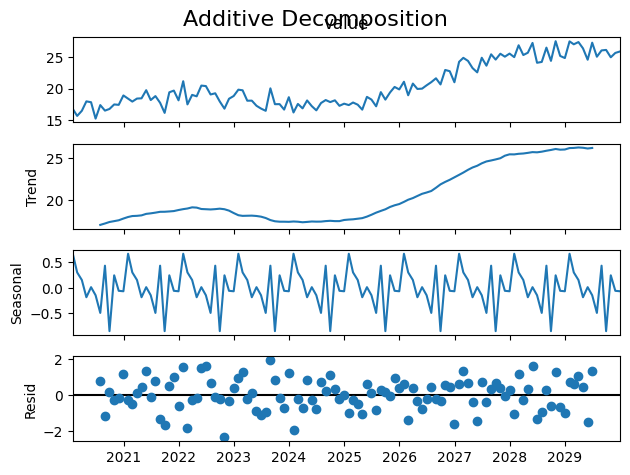

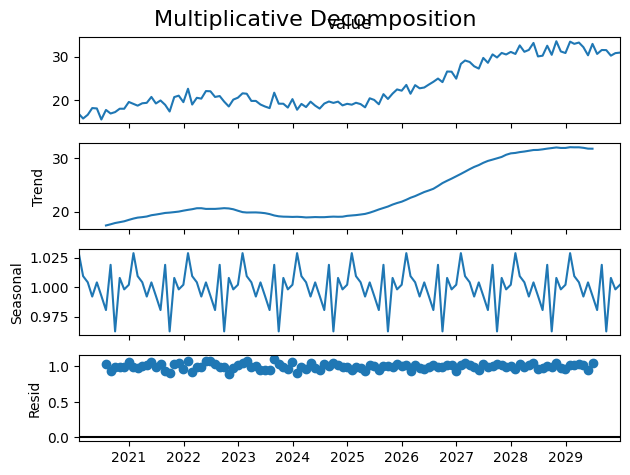

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Simulate time series data
np.random.seed(0)
n = 120
time = pd.date_range(start='2020-01-01', periods=n, freq='M')
trend = np.linspace(10, 20, n)
seasonality = 5 + np.sin(np.linspace(0, 3 * np.pi, n)) * 2
noise = np.random.normal(0, 1, n)
data_additive = trend + seasonality + noise  # Additive example
data_multiplicative = trend * (1 + seasonality / 10) + noise  # Multiplicative example

# Create DataFrame
df_additive = pd.DataFrame({'time': time, 'value': data_additive})
df_multiplicative = pd.DataFrame({'time': time, 'value': data_multiplicative})

# Set time as index
df_additive.set_index('time', inplace=True)
df_multiplicative.set_index('time', inplace=True)

# Additive Decomposition
additive_decomp = sm.tsa.seasonal_decompose(df_additive['value'], model='additive')
additive_decomp.plot()
plt.suptitle('Additive Decomposition', fontsize=16)
plt.show()

# Multiplicative Decomposition
multiplicative_decomp = sm.tsa.seasonal_decompose(df_multiplicative['value'], model='multiplicative')
multiplicative_decomp.plot()
plt.suptitle('Multiplicative Decomposition', fontsize=16)
plt.show()

In [32]:
df_multiplicative

,value
time,
2020-01-31,16.764052
2020-02-29,15.685771
2020-03-31,16.551617
2020-04-30,18.101652
2020-05-31,18.015756
...,...
2029-08-31,31.523419
2029-09-30,31.498714
2029-10-31,30.218539


C:\Users\Aniket\AppData\Local\Temp\ipykernel_30152\1252277426.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='2000-01-01', end='2023-12-31', freq='M')


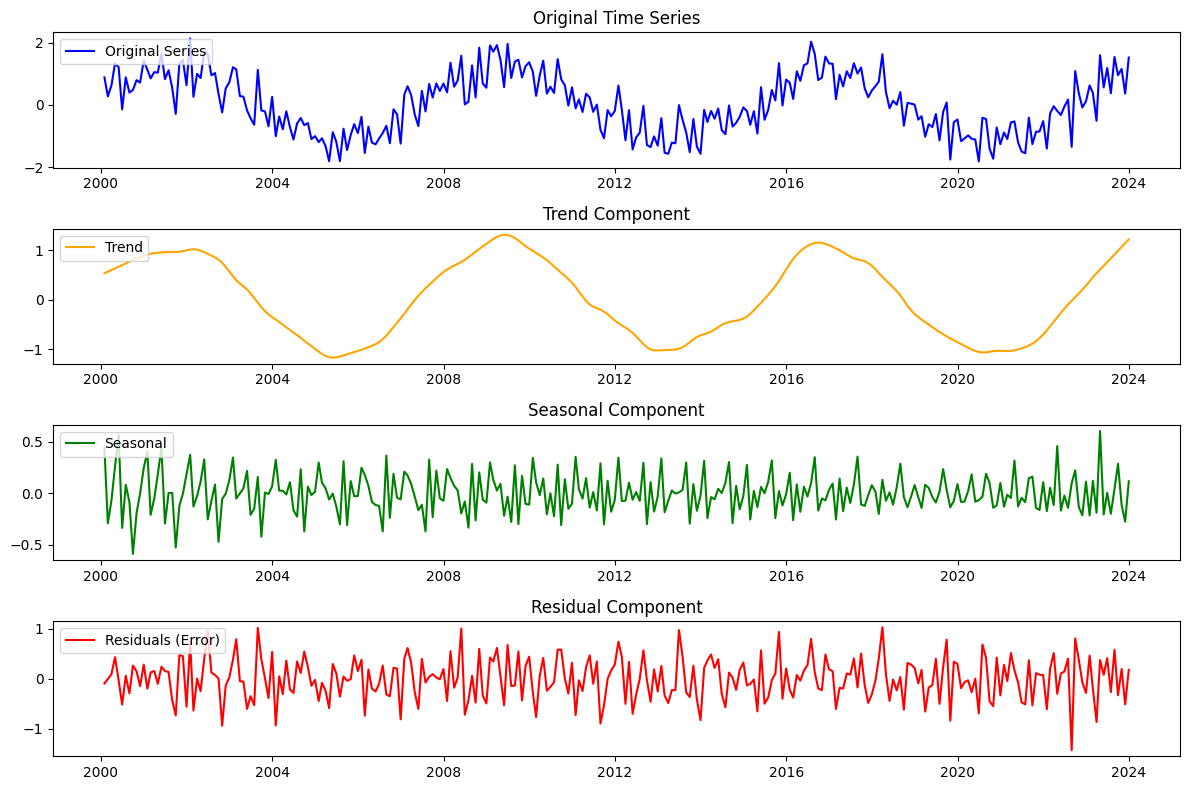

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Generate sample time series data (or load your own data)
date_rng = pd.date_range(start='2000-01-01', end='2023-12-31', freq='M')
np.random.seed(0)
data = np.sin(np.linspace(0, 20, len(date_rng))) + np.random.normal(0, 0.5, len(date_rng))
time_series = pd.Series(data, index=date_rng)

# Decompose the time series using STL
stl = STL(time_series, seasonal=13)  # Adjust seasonal for your data's frequency
result = stl.fit()

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time_series, label='Original Series', color='blue')
plt.title('Original Time Series')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals (Error)', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Generate example data
np.random.seed(42)
n = 1000
X1 = np.random.normal(size=n)
X2 = np.random.normal(size=n)
y = (X1 + X2 + np.random.normal(size=n) > 0).astype(int)

# Create a DataFrame
df = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'y': y
})

# Add the interaction terms for Box-Tidwell test (X * log(X))
df['X1_logX1'] = df['X1'] * np.log(df['X1'].replace(0, 1e-10))  # Replace 0 to avoid log(0)
df['X2_logX2'] = df['X2'] * np.log(df['X2'].replace(0, 1e-10))

# Add a constant for the logistic regression model
X = df[['X1', 'X2', 'X1_logX1', 'X2_logX2']]
X = sm.add_constant(X)

# Fit logistic regression model with the interaction terms
logit_model = sm.Logit(df['y'], X)
result = logit_model.fit()

# Display summary
print(result.summary())

c:\Users\Aniket\miniconda3\envs\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Aniket\miniconda3\envs\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


MissingDataError: exog contains inf or nans